<a href="https://colab.research.google.com/github/SaiPallavi7989/Python/blob/main/Visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
df = pd.read_csv('/content/netflix1.csv')
print(df.isnull().sum())
df = df.dropna(subset=['rating'])
df['release_year'] = df['release_year'].astype(int)
df['date_added'] = pd.to_datetime(df['date_added'])
df['primary_genre'] = df['listed_in'].apply(lambda x: x.split(',')[0])
df.head()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64


,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,primary_genre
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",Crime TV Shows
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",TV Dramas
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies",Children & Family Movies
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",Dramas


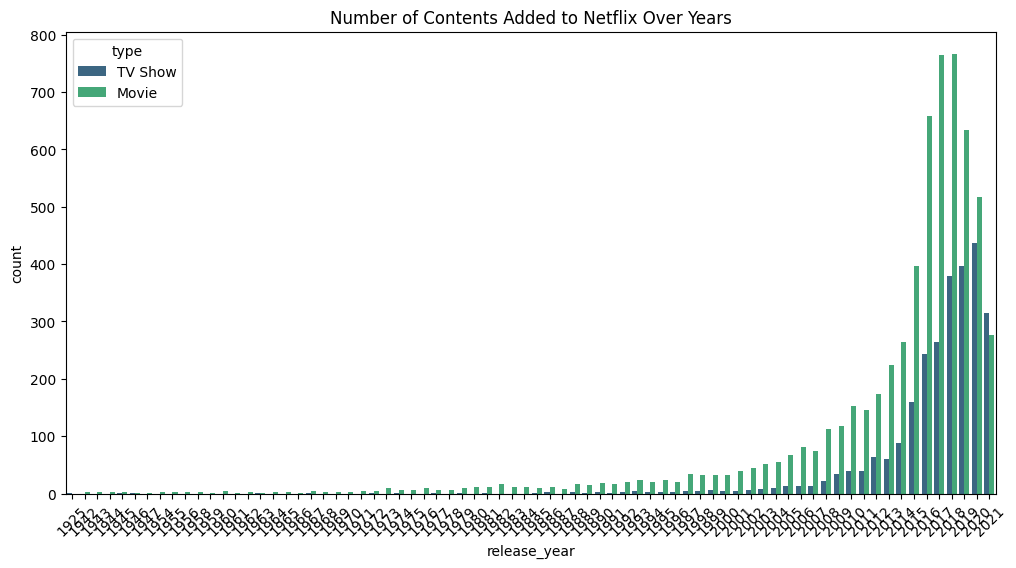

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='release_year', data=df,hue='type', palette='viridis')
plt.title('Number of Contents Added to Netflix Over Years')
plt.xticks(rotation=45)
plt.show()

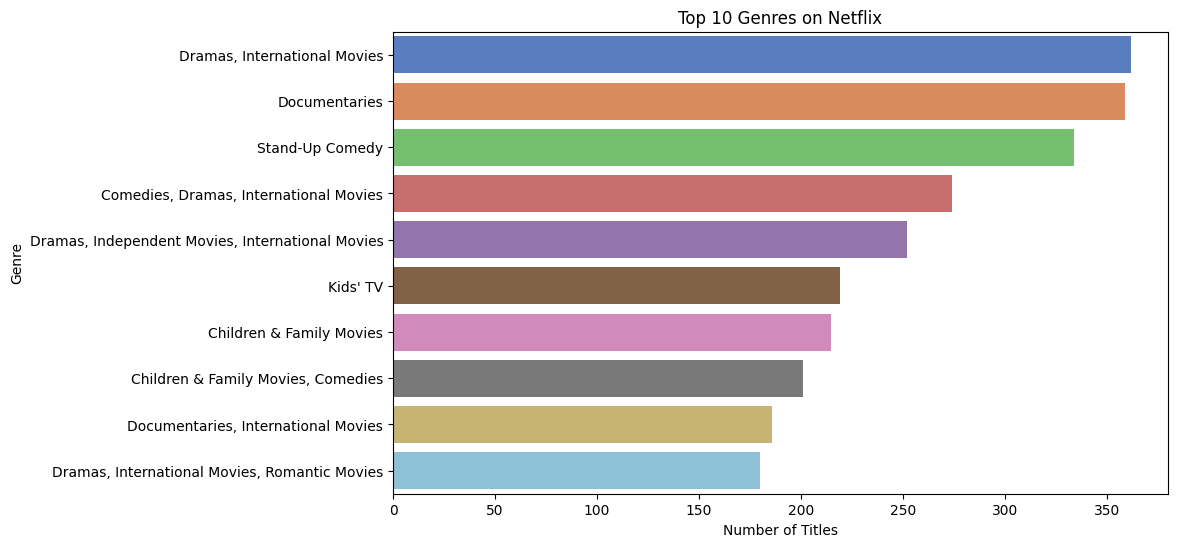

In [ ]:
plt.figure(figsize=(10, 6))
top_genres = df['listed_in'].value_counts().head(10)
sns.barplot(x=top_genres.values, y=top_genres.index, palette='muted',hue=top_genres.index)
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.show()

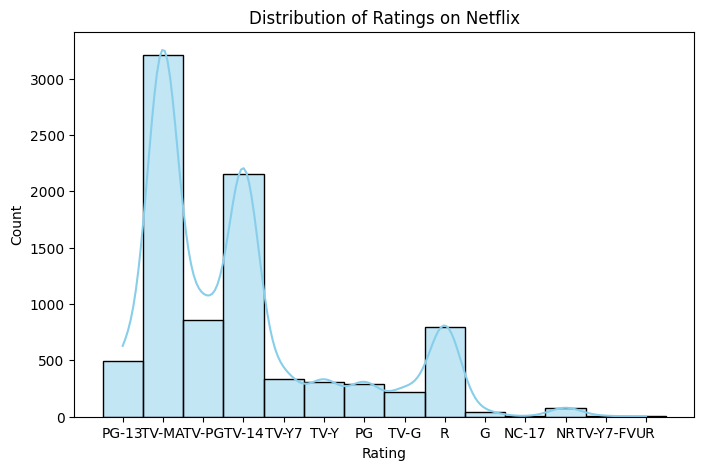

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(df['rating'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of Ratings on Netflix')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


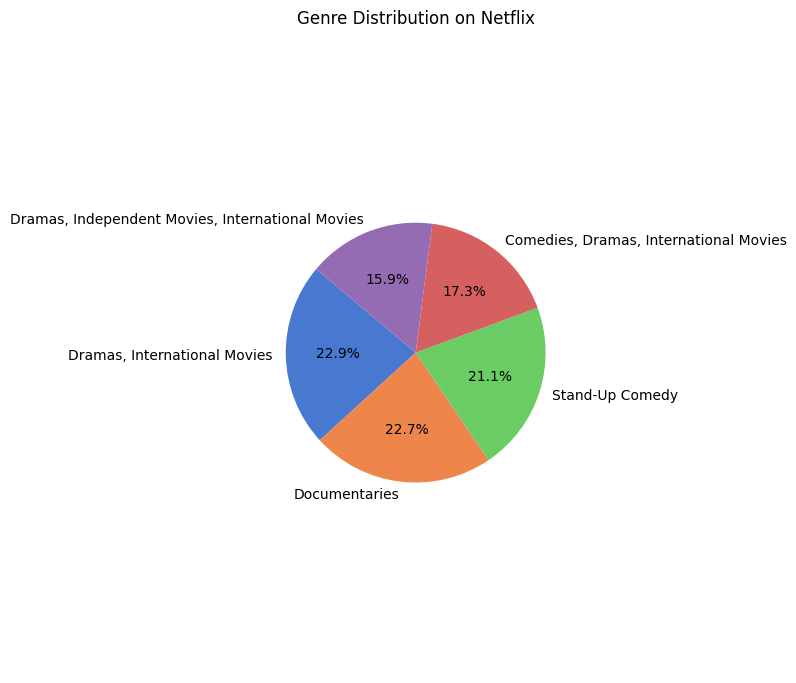

In [ ]:
plt.figure(figsize=(7, 7))
genre_counts = df['listed_in'].value_counts().head(5)
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('muted'))
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Genre Distribution on Netflix')
plt.tight_layout()
plt.show()


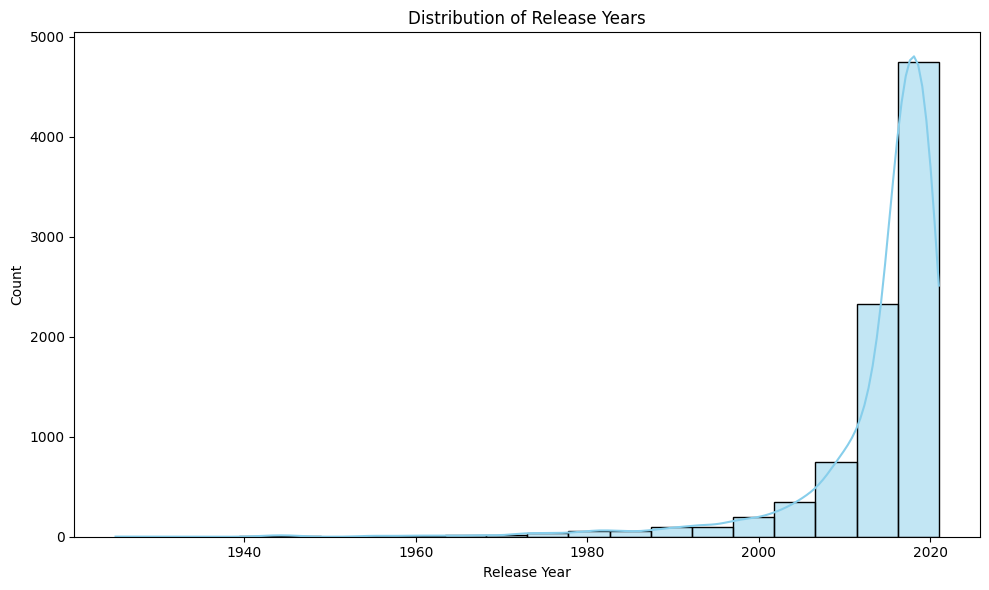

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['release_year'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Release Years')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


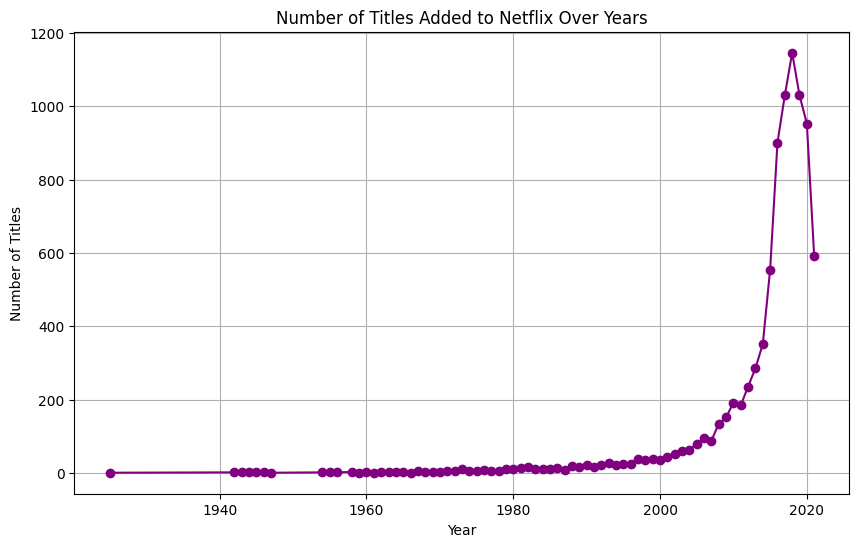

In [ ]:
titles_per_year = df['release_year'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.plot(titles_per_year.index, titles_per_year.values, marker='o', linestyle='-', color='purple')
plt.title('Number of Titles Added to Netflix Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.grid(True)
plt.show()

In [ ]:
genre_hierarchy = df['listed_in'].str.split(', ').explode().reset_index(drop=True)
fig = px.sunburst(genre_hierarchy, path=[genre_hierarchy],
                  title='Genre on Netflix')
fig.show()
